#### Introduction
This projects aims at predicting profits of food in respect to the population of a specific location

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### Load the dataset

In [3]:
with open('data/price_pop.txt', 'r') as file:
    names = ['price', 'population']
    price_pop_dataset = pd.read_csv(file,names=names)

In [4]:
dataset = price_pop_dataset
x = dataset['price']
y = dataset['population']
num_iters = 1500;
alpha = 0.01;

Text(0, 0.5, 'Price of in $10,000s')

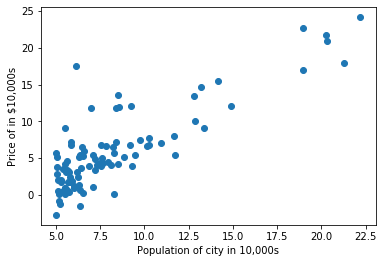

In [5]:
plt.scatter(x,y)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Price of in $10,000s')

#### convert x and y to X AND Y matrices

#### Calculating the cost function
Formular is 
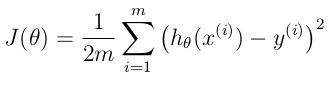

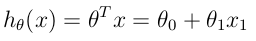

In [6]:
X = np.c_[np.ones(dataset.shape[0]),x]
Y = np.c_[y]

In [7]:
def compute_costfunction(X,y, theta=[[0],[0]]):
    m = y.size
    J = 0;
    predictions = X.dot(theta)
    J = 1/(2*m)*np.sum(np.square(predictions-y))
    return J

In [8]:
def gradient_decent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters);
    for iter in np.arange(num_iters):
        err=(X.dot(theta))-y
        theta = theta - alpha*(1/m)*(X.T.dot(err))
        J_history[iter] = compute_costfunction(X, y, theta)
    return (theta, J_history)

    

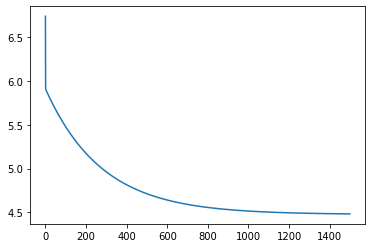

In [9]:
theta, Costj = gradient_decent(X,Y,[[0],[0]],  alpha, num_iters)
plt.plot(Costj);

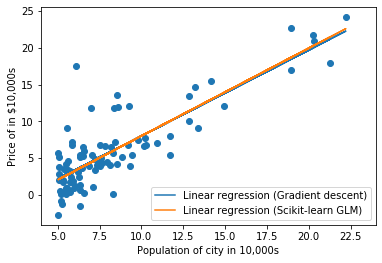

In [10]:
plt.scatter(x,y)
plt.plot(x,X.dot(theta), label='Linear regression (Gradient descent)')

regr = LinearRegression()
regr.fit(x.values.reshape(-1,1), y.ravel())
plt.plot(x, regr.intercept_+regr.coef_*x, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Price of in $10,000s');

#### Evaluate our model

In [11]:
theta.T.dot([1, 6.1101])

array([3.49629916])